<a href="https://colab.research.google.com/github/SrMouraSilva/Aprendizagem-probabilistica/blob/main/Trabalho_4_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Por favor**, veja esse arquivo online em: https://colab.research.google.com/drive/1o0d0F7oNDmJ2GjO-wPQk2MI7jc5zTVfc?usp=sharing

In [ ]:
# Programação simbólica
import sympy as sp
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nas células
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd

# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm 
import seaborn as sns
sns.set_theme()

np.random.seed(42)

In [ ]:
# Ajustes nas configurações padrões dos plots
mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

Universidade Federal do Ceará
* **Disciplina**: TÓPICOS AVANÇADOS EM APRENDIZAGEM DE MÁQUINA / TÓPICOS ESPECIAIS EM LÓGICA II
* **Código**: CK0255/CKP8377
* **Professores**: João Paulo P. Gomes / César Lincoln C. Mattos
* **Semestre**: 2020.2
* **Discente**: Paulo Mateus M. da Silva
* **Matrícula**: 486351
* **Curso**: Ciência da Computação

# Trabalho 4

> **Leia as instruções:**
> 
> * O trabalho é individual.
> * As simulações poderão ser realizadas em quaiquer linguagens de programação.
> * Para a avaliação do trabalho deverá ser submetido um arquivo pdf com texto e figuras referentes aos
resultados das simulações.
> * Para a avaliação do trabalho deverão ser enviados os códigos fonte.


## Item 1. Implemente a solução MAP para o GMM (Gaussian Mixture Model) utilizando os dados disponíveis em `clusteringdata.csv`.

* Realize testes do seu método variando o numero de componentes do GMM (utilize `2`, `4`, `6`, `8` e `10`);
* Apresente uma figura com a distribuição a posteriori e os dados usados para treinamento.

### Arquivo `clusteringdata.csv`

**Obs**: Adicionei uma linha cabeçalho

In [ ]:
#@markdown
import csv
from io import StringIO

clustering_data = """x1,x2
-9.324269255372453102e+00,-8.524550141132946735e+00
-4.802893198206633407e+00,4.568390530471925892e+00
-9.151913292427430235e+00,-7.235600109377815947e+00
6.631406355381494144e+00,6.885713557351305525e+00
5.800550298482471057e+00,7.154082374540695177e+00
1.030102734071604509e+01,4.888417148777447707e+00
-4.442157856363377455e+00,3.011476657383327371e+00
5.061953406926654075e+00,8.619589596121628006e+00
8.593262134118289097e+00,-2.328679114750149992e+00
-3.598939639463502704e+00,1.564483815915510334e+00
9.158712793500402682e+00,3.975956089473732469e+00
1.331007260941902137e+00,-3.933398192121111414e-01
1.001414628633576598e+01,5.384689580291997402e+00
-1.058941054360873935e+01,-7.153026631569211702e+00
-1.801266134451876777e+00,2.448823251147097757e+00
1.075025165207713762e+01,5.083218783034178401e+00
7.878777871246573028e+00,-4.503642447218195954e+00
5.174783048690662746e+00,9.032733613555901542e+00
9.945238691508405893e+00,-2.786059567772693146e+00
8.292772147001977956e+00,3.914133036168329749e+00
8.124317874112453097e+00,3.648686966568674972e+00
-7.182381164889859448e+00,-5.348649135911172081e+00
-7.628654017429007617e+00,-5.622444681925051313e+00
8.564076902051603213e+00,3.286437483266593684e+00
4.679726980858616159e+00,9.086992533334832700e+00
8.894935418255467852e+00,-3.148716840213865442e+00
7.020317401728378703e-01,6.925920830038923004e-01
-5.870713340715541406e+00,5.196931512897331906e+00
-6.251747077627359594e+00,-5.662120318956977982e+00
6.590684546682558320e+00,-4.044331445504536049e+00
2.207465613873776711e+00,9.550252072906166845e-01
2.189087395041022788e-02,2.985516749680011905e+00
8.052580410821292389e+00,-3.195503897951982530e+00
8.272049334177916435e+00,3.060290899600635495e+00
9.341606495633319796e+00,1.905822471118692851e+00
-4.393413246095307478e+00,4.174136194900802899e+00
4.982400145250364787e+00,6.972887343270178562e+00
2.217080664163780135e+00,1.900862157496285842e+00
2.112863726649312213e+00,1.250369731860463629e+00
-7.587558258151803514e+00,-5.788967304278655135e+00
5.277009353735192754e+00,6.604691585852161317e+00
9.175362190129590090e+00,5.067239299847952516e+00
-1.065622508106048372e+01,-6.550546623413543657e+00
5.307903287500006506e+00,9.928244892935214949e+00
2.701498938623474899e+00,8.059302505191206834e+00
1.010699733060305583e+01,3.497151543085537995e+00
5.623454521890754343e+00,7.577149901953608158e+00
3.730150901232097915e+00,7.425294807957117271e+00
5.563102488530587308e+00,3.224073989834671750e+00
4.449397924554780559e+00,3.528399288330783978e+00
-5.943639655520733811e+00,-6.662680963729103567e+00
1.058955978943541965e+01,4.725982147282537404e+00
4.945468611519403090e+00,2.142391214800354327e+00
7.406061036900972283e+00,8.713543006223636311e+00
-7.863619294332222509e+00,-6.879530341198388577e+00
-1.013358432104930884e+01,-7.372320976133003079e+00
9.478501075148658472e+00,5.233003375121370482e+00
8.799172690462439661e+00,5.713686820682109868e+00
-1.013650711714607588e+01,-9.548902711807290444e+00
6.073522810817679307e+00,4.052325894522013527e+00
5.908101509651762839e+00,1.502126811832787734e+00
5.628796179813461364e+00,7.070876721772978435e+00
4.388645064474754776e+00,4.653097511230161132e+00
1.042043305099594974e+01,3.905343491530981037e+00
8.541030944384655044e+00,4.341097686469296946e+00
-4.136483084177122294e+00,4.355610656491127664e+00
1.029183383720622125e+01,2.560454546071071924e+00
-1.010452701640925888e+01,-7.888253901677580338e+00
8.015234553302189369e+00,-3.548367632690874185e+00
-8.681042573841793342e+00,-6.108337384274873827e+00
5.007742902992521117e+00,3.866650572896031424e+00
-9.374293898074565590e+00,-7.315958055724735232e+00
5.221872924315354325e+00,6.808809019274738361e+00
1.404509937537916198e+00,2.581109653935284687e+00
4.495560105017738728e+00,3.035133570933290947e+00
7.035026123492742478e+00,7.710411487216735082e+00
5.096242504368786008e+00,2.322865868542972834e+00
8.668016169652787539e+00,2.142373329418405969e+00
-5.990338116263592028e+00,-4.559052214440420414e+00
-7.385136214511652142e+00,-5.575911713331534791e+00
1.026134716586782680e+01,-4.111058644199854228e+00
6.589032390035557185e+00,1.021514302338566438e+01
3.412475456862054557e+00,2.508857228959981089e+00
5.269694149559324359e+00,9.198626660291200352e+00
-8.525514316241634916e+00,-8.311666036242296940e+00
-2.105141462759979820e+00,3.874656699885900668e+00
-6.333485367529193333e+00,-4.903982838152126433e+00
9.602314115563590491e+00,3.896321465641242821e+00
-3.298556943031860644e+00,2.259492927265893680e+00
5.461953978894463546e+00,6.715013595975557692e+00
6.222090202386210578e+00,-5.533249696915016891e+00
-2.805971359691752376e+00,2.880524545448787777e+00
-1.946058566507165022e-01,1.933078658243203574e+00
-9.645254527031035252e+00,-8.262837714929942123e+00
3.931809207379603599e+00,8.823307797043483447e+00
2.681695195419367295e+00,9.916325018399816393e-01
4.537231777197452409e+00,9.209127684630194821e+00
6.648542457014682938e+00,4.320721135052039585e+00
1.184126577577371009e+01,-4.693716432719878817e+00
2.078142086931658028e+00,2.600895912394190379e+00
"""

dataset_1 = pd.read_csv(StringIO(clustering_data))
dataset_1

,x1,x2
0,-9.324269,-8.524550
1,-4.802893,4.568391
2,-9.151913,-7.235600
3,6.631406,6.885714
4,5.800550,7.154082
...,...,...
95,2.681695,0.991633
96,4.537232,9.209128
97,6.648542,4.320721
98,11.841266,-4.693716


### Gráfico dos pontos de `clustering_data.csv`

O gráfico seguinte apresenta os pontos do `clustering_data.csv` por meio de uma visualização _Scatter plot_. Nota-se visualmente que os pontos aparentemente apresentam-se agrupados.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


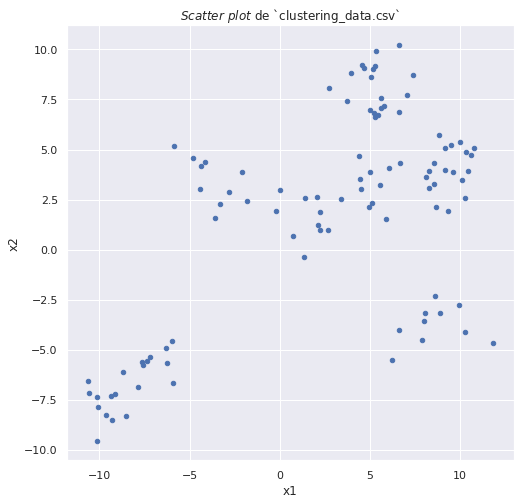

In [ ]:
dataset_1.plot.scatter(x='x1', y='x2', title="$Scatter\ plot$ de `clustering_data.csv`")

### Implementação do modelo

Nesta subseção, são apresentados:
* a implemenação do GMM com Solução MAP;
* código relacionado ao processo de treinamento, especificamente sobre a inicialização dos hiperparâmetros do modelo;
* código das visualizações utilizadas.

A subseção posterior a esta contém o solicitado no trabalho.

#### Implementação

Esta subseção contém códigos utilitários e o modelo requisitado no trabalho.

##### Utilitários

Funções utilitárias para a realização de tarefas rotineiras.

In [ ]:
from scipy.stats import multivariate_normal


def Normais(X, Means, Σ):
    """
    Calcular várias gaussianas de uma vez

    @param Means: Matriz de médias μ para cada k-ésimo _cluster_
    @param Σ: Matrizes de covariancia para cada k-ésimo _cluster_

    return Matriz N(X|μ_k, Σ_k) for i in K,
           onde μ_k = Means[k]
    """
    N_X, D_X = X.shape
    N_μ, D_μ = Means.shape
    Normais_pdf = np.zeros((N_μ, N_X))

    for i in range(N_μ):
        μ_i = Means[i, :]
        Σ_i = Σ[i, :, :]

        gaussiana = multivariate_normal(mean=μ_i.flatten(), cov=Σ_i)
        Normais_pdf[i] = gaussiana.pdf(X)

    return Normais_pdf

##### `GaussianMixtureModelMAP` - Modelo de Mistura de Gaussianas com solução MAP
 
* @param $K$: Total de componentes (_clusters_) da GMM
* @param $\mathbf{α}$: Parâmetro $α$ da distribuição de Dirichlet para cada $k$-ésimo _cluster_
* @param $\boldsymbol{m}_0$: Parâmetro $\boldsymbol{m}_0$ (ou $\boldsymbol{\mu}_0$) da distribuição Normal-inverse-wishart (NIW)
* @param $κ_0$: Parâmetro $κ_0$ da distribuição Normal-inverse-wishart (NIW)
* @param $ν_0$: Parâmetro $ν_0$ da distribuição Normal-inverse-wishart (NIW)
* @param $\boldsymbol{S}_0$: Parâmetro $\boldsymbol{S}_0$ da distribuição Normal-inverse-wishart (NIW)
* @param $\mathbf{π}_0$: $p(z_i=k)$ = Probabilidade a priori do dado pertencer 
  ao $k$-ésimo _cluster_
* @param $\text{Means}_0$: Matriz composta de vetores médias $\mathbf{μ}_0$ iniciais para cada $k$-ésimo _cluster_
* @param $\mathbf{Σ}_0$: Matrizes de covariancia iniciais para cada $k$-ésimo _cluster_

In [ ]:
class GaussianMixtureModelMAP:
    def __init__(self, K, α, m_0, κ_0, ν_0, S_0, π_0, Means_0, Σ_0):
        """
        `GaussianMixtureModelMAP` - Modelo de Mistura de Gaussianas com solução MAP
 
        @param $K$: Total de componentes (_clusters_) da GMM
        @param $\mathbf{α}$: Parâmetro $α$ da distribuição de Dirichlet para cada $k$-ésimo _cluster_
        @param $\boldsymbol{m}_0$: Parâmetro $\boldsymbol{m}_0$ (ou $\boldsymbol{\mu}_0$) da distribuição Normal-inverse-wishart (NIW)
        @param $κ_0$: Parâmetro $κ_0$ da distribuição Normal-inverse-wishart (NIW)
        @param $ν_0$: Parâmetro $ν_0$ da distribuição Normal-inverse-wishart (NIW)
        @param $\boldsymbol{S}_0$: $\boldsymbol{S}_0$: Parâmetro $\boldsymbol{S}_0$ da distribuição Normal-inverse-wishart (NIW)
        @param $\mathbf{π}_0$: $p(z_i=k)$ = Probabilidade a priori do dado pertencer
                               ao $k$-ésimo _cluster_
        @param $\text{Means}_0$: Matriz composta de vetores de médias $\mathbf{μ}_0$ iniciais para cada $k$-ésimo _cluster_
        @param $\mathbf{Σ}_0$: Matrizes de covariancia iniciais para cada $k$-ésimo _cluster_
        """
        self.K = K

        self.α = α

        self.m_0 = m_0

        self.κ_0 = κ_0
        self.ν_0 = ν_0
        
        self.S_0 = S_0
        self.π_0 = π_0

        self.Means_0 = Means_0
        self.Σ_0 = Σ_0

        self.M = Means_0
        self.Σ = Σ_0

    def fit(self, X, t_maximo=10):
        π = self.π_0
        M = self.M
        Σ = self.Σ

        log_likelihoods = []
        
        for t in range(1, t_maximo+1):
            R = self.expectation(X, π, M, Σ)
            π, M, Σ = self.maximization(X, R, self.α)

            ll = self.log_likelihood(X, π, M, Σ)
            log_likelihoods.append(ll)
        
        self.M = M
        self.Σ = Σ

        return log_likelihoods

    def expectation(self, X, π, M, Σ):
        """
        r_ik = p(z_i=k|x_i, θ)

        @param X: Conjunto de dados
        @param π: Probabilidade a priori do dado pertencer ao k-ésimo _cluster_
        @param M: Matriz de médias μ para cada k-ésimo _cluster_
        @param Σ: Matrizes de covariancia para cada k-ésimo _cluster_
        
        @return R = Matriz dos k-ésimos r_k vetores responsabilidade
        """
        R = π * Normais(X, M, Σ)
        return R / np.sum(R, axis=0)

    def maximization(self, X, R, α):
        K = self.K
        κ_0 = self.κ_0
        N, D = X.shape
        m_0 = self.m_0

        # Murphy 11.41
        r = R.sum(axis=1).reshape((-1, 1))
        π = (α - 1 + r) / (N - K + np.sum(α))

        # Murphy 11.45
        x_mean = (R @ X) / r

        # Murphy 11.43
        Means = ((κ_0*m_0).flatten() + x_mean*r) / (κ_0 + r)

        # Murphy 11.46 e 11.47
        Σ = np.zeros((K, D, D))
        for k in range(K):
            x_mean_k = x_mean[k].reshape((-1, 1))

            Σ[k] = self.Σ_k(k, X, x_mean_k, R, r)

        return π, Means, Σ

    # Murphy 11.46
    def Σ_k(self, k, X, x_mean_k, R, r):
        _, D = X.shape
        ν_0, κ_0 = self.ν_0, self.κ_0
        m_0 = self.m_0

        r_k = r[k, 0]

        Σ_k_numerador = self.S_0 + self.S_k(k, X, x_mean_k, R) \
                        + (κ_0*r_k)/(κ_0+r_k) * (x_mean_k - m_0)@(x_mean_k - m_0).T
        Σ_k_denominador = (ν_0 + D + 2 + r_k)

        return Σ_k_numerador/Σ_k_denominador

    # Murphy 11.47
    def S_k(self, k, X, x_mean_k, R):
        N, D = X.shape

        S_k = np.zeros((D, D))
        for i in range(N):
            x_i = X[i, :].reshape((-1, 1))
            r_ik = R[k, i]

            S_k += r_ik * (x_i - x_mean_k)@(x_i - x_mean_k).T

        return S_k

    def log_likelihood(self, X, π, M, Σ):
        return np.log(np.sum(π * Normais(X, M, Σ)))

#### Inicialização

Nesta subseção. são apresentados códigos utilizados para a inicialização dos hiperparâmetros do modelo. A seguir são apresentados duas formas de inicializar as matrizes de médias e as matrizes de covariância. No fim, encontra-se a função que define os hiperparâmetros restantes.

###### **Inicialização `k-means++`**

Inicialização segue a ideia apresentada em "Murphy 11.4.2. - Initialization and avoiding local minima" e no Slide 18.

Implementação do $k$-médias utilizada: [`scipy.cluster.vq.kmeans2`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html) com inicialização `minit='++'`. Note que esse "$k$-means" não foi implementado por mim, entretanto, não foi utilizado para a realização do trabalho, estando aqui como algo adicional.

**Descrição:**

`k-means++`: Vetores de médias ($\text{Means}_0$) e matrizes de covariância ($\mathbf{Σ}_0$) obtidos a partir do $k$-médias.

In [ ]:
from scipy.cluster.vq import kmeans2

def inicializacao_kmeansplusplus(X, K):
    """
    Murphy 11.4.2. - Initialization and avoiding local minima
    """
    N, D = X.shape
    Means_0, labels = kmeans2(X, K, minit='++')

    Σ_0 = np.zeros((K, D, D))
    for k in range(K):
        Σ_0[k] = np.cov(X[labels == k], rowvar=False) # = 1/(N-1) * (X-μ.T)@(X-μ.T).T

    return Means_0, Σ_0

###### **Inicialização aleatória**

Inicialização aleatória dos vetores de médias ($\text{Means}_0$) e das matrizes de covariancias ($\mathbf{Σ}_0$).


**Descrição**

* $\text{Means}_0$: Gera $K$ pontos a partir de uma distribuição uniforme cujo o intervalo é obtido pelo o mínimo e o máximo de $X$ para cada um dos $D$ atributos;
* $\mathbf{Σ}_0$: Cada $k$-ésima matriz de covariância é formado por $σ_k^2\text{I}$,
onde:
  * $σ_k^2$ é amostrado aleatoriamente entre $0$ e $10$ (`maior_incerteza=10`) a partir de uma distribuição uniforme, e;
  * $\text{I}$ corresponde a matriz identidade.


In [ ]:
def inicializacao_aleatoria(X, K, maior_incerteza=10):
    N, D = X.shape

    # Matriz de médias: Pegado K pontos aleatórios entre a região que os pontos se encontram
    Means_0 = np.random.uniform(X.min(axis=0), X.max(axis=0), size=(K, D))

    # Matriz de médias: Pegado K amostras aleatórias para serem consideradas as médias
    #Means_0 = X[sample(range(N), K), :]

    # Tensor de covariâncias:
    #  Cada k-ésima Matriz de Covariância = I_D * σ^2,
    #  onde σ^2 é amostrado aleatoriamente o entre 0 e 1
    Σ_0 = np.ones((K, D, D)) * np.eye(D) * maior_incerteza * np.random.random_sample(size=K).reshape((K, 1, 1))

    return Means_0, Σ_0

##### `inicializar_GMMMAP()`: Função de inicialização do modelo

Os seguintes hiperparâmetros foram definidos conforme as dicas do **slide 27**:
 * $\boldsymbol{m}_0$, que corresponde ao $\boldsymbol{\mu}_0$ do **slide 27**;
 * $κ_0$;
 * $ν_0$;
 * $\boldsymbol{S}_0$.

Para os outros parâmetros, os critérios de definição dos valores foram:
 * $\mathbf{α}$: Escolhido `1` para todas as $K$ distribuições. \
   Justificativa: Escolha arbitrária;
 * $\mathbf{π}_0$: Equiprovável (todos as distribuições tem, a priori, a mesma chance).

Por fim, os valores dos seguintes parâmetros são definidos conforme a função informada no parâmetro `inicializacao`:
  * $\text{Means}_0$;
  * $\mathbf{Σ}_0$.

In [ ]:
def inicializar_GMMMAP(X, K, metodo_inicializacao):
    N, D = X.shape

    metodo_inicializacao = inicializacao_aleatoria if metodo_inicializacao is None else metodo_inicializacao
    Means_0, Σ_0 = metodo_inicializacao(X, K)

    return GaussianMixtureModelMAP(
        K=K,
        α=np.ones((K, 1)),
        m_0=X.mean(axis=0).reshape((-1, 1)),

        κ_0=0.01,
        ν_0=D+2,
        S_0 = 1/(K**(2/D)) * np.cov(X.T),

        # Vetor π
        π_0 = np.ones((K, 1)) * 1/K,

        # Matriz de médias
        Means_0=Means_0,
        # Tensor de covariâncias
        Σ_0 = Σ_0
    )

#### Gráficos

Nesta subseção, encontra-se a implementação dos gráficos utilizados no trabalho. No fim, é realizado um treinamento para testar os gráficos e o treinamento.


##### `plot_distribuicao`

Apresenta uma figura com a distribuição a posteriori e os dados usados para treinamento.



In [ ]:
def plot_distribuicao(modelo, X, K, ax=None, title=""):
    N, _ = X.shape

    x1 = np.linspace(-12, 13, 150)
    x2 = np.linspace(-12, 13, 150)
    X_grid = np.dstack(np.meshgrid(x1, x2))

    dados = np.zeros((K, *x1.shape, *x2.shape))
    valores = np.zeros((K, N))
    for k in range(K):
        μ_k = modelo.M[k]
        Σ_k = modelo.Σ[k]
        
        gaussiana_k = multivariate_normal(mean=μ_k.flatten(), cov=Σ_k)
        dados[k] = gaussiana_k.pdf(X_grid)
        valores[k] = gaussiana_k.pdf(X)

    # Plot
    ax = plt.axes() if ax is None else ax

    # Contornos
    # Não sei pq não funciona
    #ax.contourf(x1, x2, np.log(dados.sum(axis=0)), levels=100, cmap=cm.Blues)
    # FIXME - Verificar eixo
    #ax.contourf(x1, x2, np.exp(np.log(dados).sum(axis=0)), levels=100, cmap=cm.Blues)
    ax.contourf(x1, x2, dados.sum(axis=0), levels=100, cmap=cm.Blues)

    for k in range(K):
        ax.contour(x1, x2, dados[k], levels=6, linestyles='dotted', linewidths=0.5, colors='black', zorder=1)

    # Pontos
    marcadores = 'ov^<>spP*hHxXDd1234|_.'
    categoria = valores.argmax(axis=0)
    for k in range(K):
        marcador = marcadores[k]
        ax.scatter(X[:, 0][categoria==k], X[:, 1][categoria==k], c='r', marker=marcador)

    # Outros detalhes
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(title)

##### `plot_geral`

Gráfico de um conjunto de execuções de um modelo.

In [ ]:
def plot_geral(inicializador_modelo, total_iteracoes=100):
    Ks = [2, 4, 6, 8, 10]
    largura = 7
    altura = 6

    fig, axes = plt.subplots(3, 4, figsize=(largura*4, altura*3), sharex='col', sharey='col')
    log_likelihoods = dict()

    for K, ax_antes, ax_depois in zip(Ks, axes.flatten()[::2], axes.flatten()[1::2]):
        modelo = inicializador_modelo(X, K=K)
        plot_distribuicao(modelo, X, K, ax=ax_antes, title=f"Dados e $\mathbf{{\mu}}_k^{{(0)}}$ e $\mathbf{{\Sigma}}_k^{{(0)}}$\n para $K={K}$")

        try:
            log_likelihoods[K] = modelo.fit(X, t_maximo = total_iteracoes)
        except Exception as e:
            print(f"Não foi possível finalizar a execução para K={K}, {e.__class__.__name__}")
        try:
            plot_distribuicao(modelo, X, K, ax=ax_depois, title=f'Distribuição a posteriori e dados de treinamento ($X$)\n para $K={K}$')
        except Exception as e:
            print(f"Não foi possível exibir a distribuição a posteriori para K={K}, {e.__class__.__name__}")

    # Linhas divisórias
    plt.plot([0.5, 0.5], [0.1, .9], color='#DDD', lw=1, transform=plt.gcf().transFigure, clip_on=False)
    plt.plot([0.1, .9], [18/28, 18/28], color='#DDD', lw=1, transform=plt.gcf().transFigure, clip_on=False)
    plt.plot([0.1, .9], [21/56, 21/56], color='#DDD', lw=1, transform=plt.gcf().transFigure, clip_on=False)

    return log_likelihoods

##### `plot_loglikelihood`

Visualização da log-verossimilhança ao longo do tempo.

In [ ]:
def plot_loglikelihood(log_likelihoods: dict):
    ax = pd.DataFrame(log_likelihoods).plot(title="Log-verossimilhança ao longo do tempo")
    ax.set_xlabel('Iteração')
    ax.set_ylabel('Log-verossimilhança')

##### **Testando gráficos**

Um treinamento é realizado como verificação simples para constar se o código está executando como esperado. Caso você queira testar outros parâmetros, após alterá-los, execute novamente **todo** o notebook 😃.



In [ ]:
#@title Configuração

#@markdown Defina a quantidade de _clusters_ e a forma como 
#@markdown será feita a inicialização dos hiperparâmetros
#@markdown do modelo.

#@markdown ##### **Parâmetros**
#@markdown Forma de inicialização dos vetores de média **μ**\_0
#@markdown e matrizes de covariância **Σ**\_0 para cada componente (_cluster_):
#@markdown 
#@markdown * `aleatoria`: Inicialização aleatória
#@markdown * `k-means++`: Vetores de médias e Matrizes de covariância obtidos a partir do k-means.
inicializacao = "aleatoria" #@param ["k-means++", "aleatoria"]

#@markdown Quantidade de componentes (_clusters_):
K =  4#@param {type:"integer"}

In [ ]:
if inicializacao == "aleatoria":
    metodo_inicializacao = inicializacao_aleatoria
else:
    metodo_inicializacao = inicializacao_kmeansplusplus

Atribuição da matriz de dados $X$:

In [ ]:
X = dataset_1.to_numpy()

Teste dos gráficos `plot_distribuicao` e `plot_loglikelihood` para os parâmetros definidos acima:

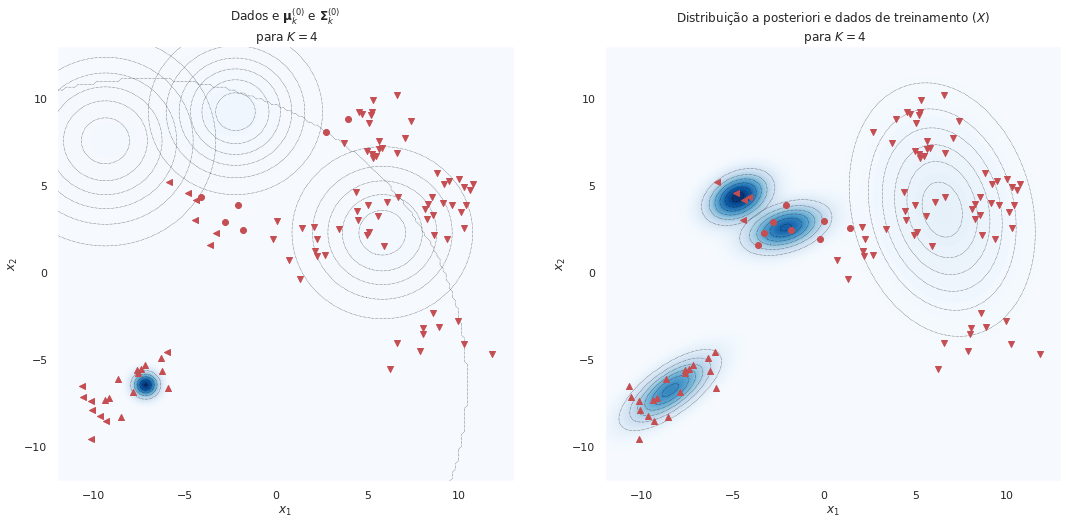

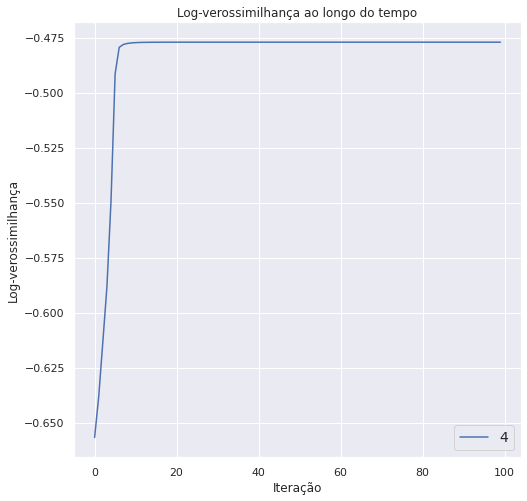

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex='col', sharey='col')

gmm = inicializar_GMMMAP(X, K=K, metodo_inicializacao=metodo_inicializacao)
plot_distribuicao(gmm, X, K, ax=axes[0], title=f"Dados e $\mathbf{{\mu}}_k^{{(0)}}$ e $\mathbf{{\Sigma}}_k^{{(0)}}$\n para $K={K}$")

log_likelihood = gmm.fit(X, t_maximo = 100)
plot_distribuicao(gmm, X, K, ax=axes[1], title=f'Distribuição a posteriori e dados de treinamento ($X$)\n para $K={K}$')

plot_loglikelihood({K: log_likelihood})

### Gráfico solicitado na questão

> Realize testes do seu método variando o número de componentes do GMM (use 2, 4, 6, 8 e 10) \
> Apresente uma figura com a distribuição a posteriori e os dados usados para treinamento


A imagem a seguir apresenta a execução do modelo para a quantidade de clusters solicitada (2, 4, 6, 8, 10). Para cada uma das cinco execuções, ocorreram 100 iterações.

Cada execução é apresentada em par: na esquerda do par, encontra-se o estado inicial do modelo, já na direita, o resultado.

A visualização também permite identificar quais os pontos associados a cada gaussiana. O símbolo de cada padrão no gráfico varia conforme a gaussiana que lhe provê maior probabilidade.

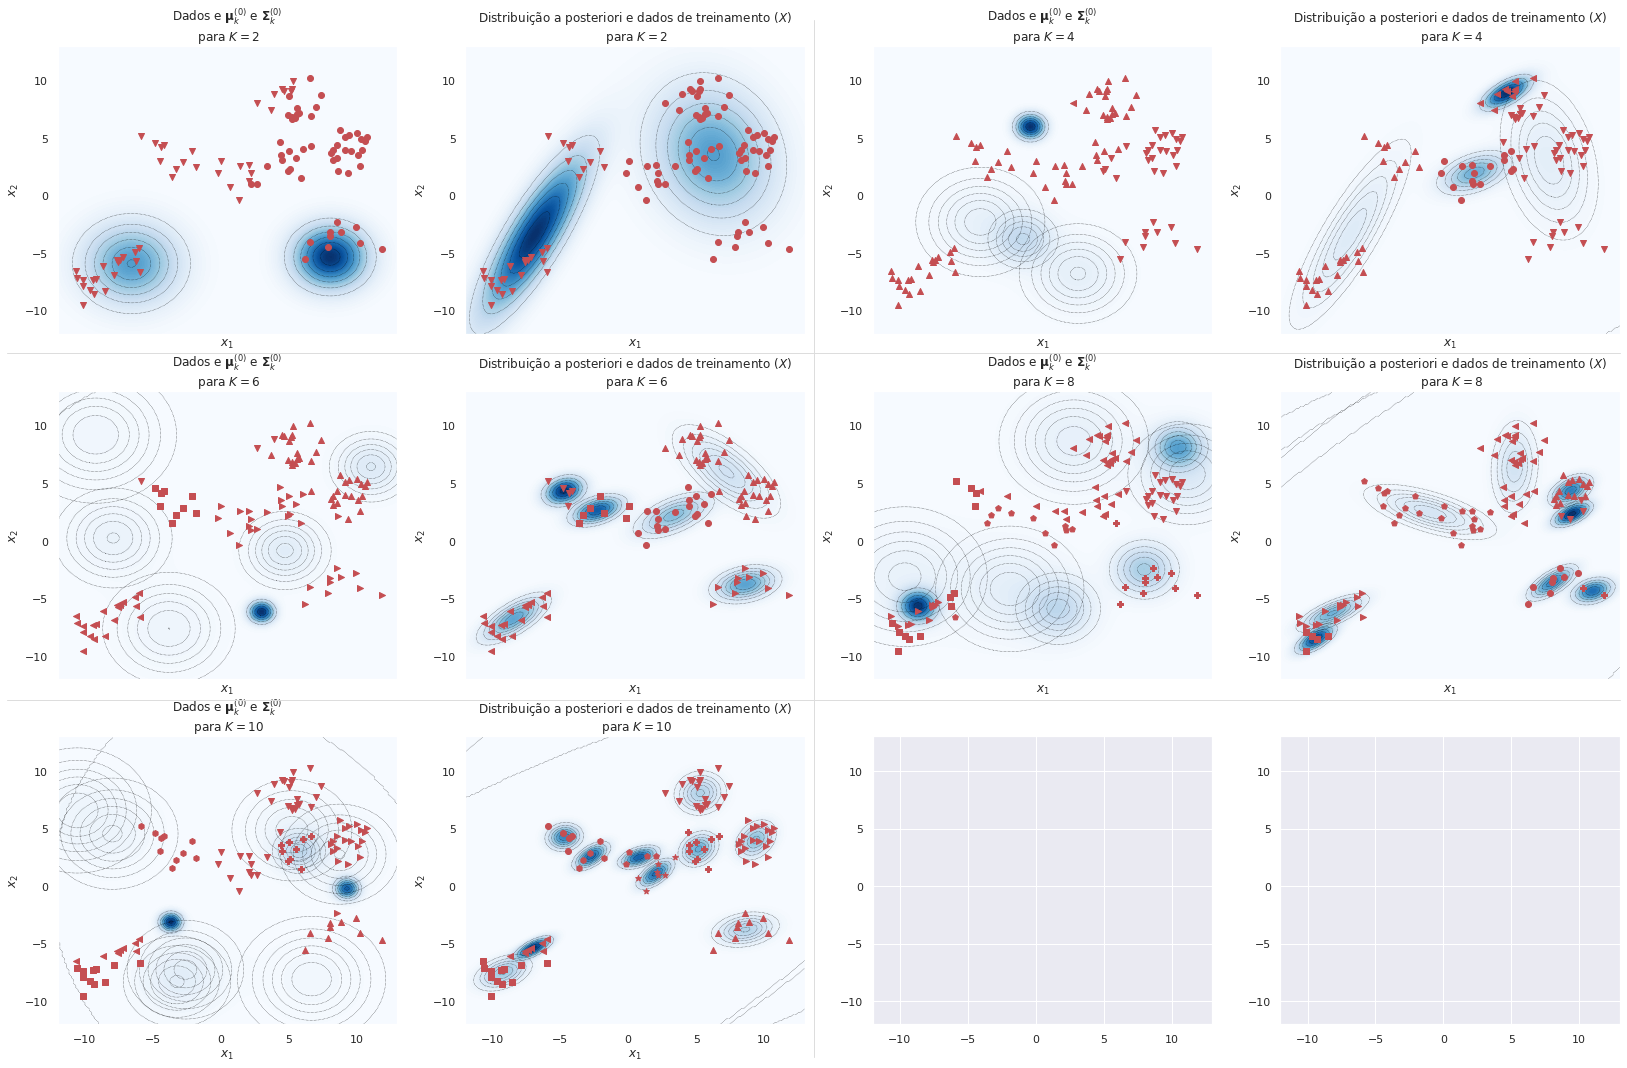

In [ ]:
log_likelihoods = plot_geral(inicializador_modelo=lambda X, K: inicializar_GMMMAP(X, K, inicializacao_aleatoria))

O gráfico seguinte apresenta o log-verossimilhança de todas as execuções. Cada execução é indicada pela cor da linha.
Nota-se que, para este experimento realizado, modelos com maior quantidade de componentes (_clusters_) apresentaram maior log-verossimilhança ao longo do tempo, tendo esse comportamento consolidado a partir da 5º iteração, aproximadamente.

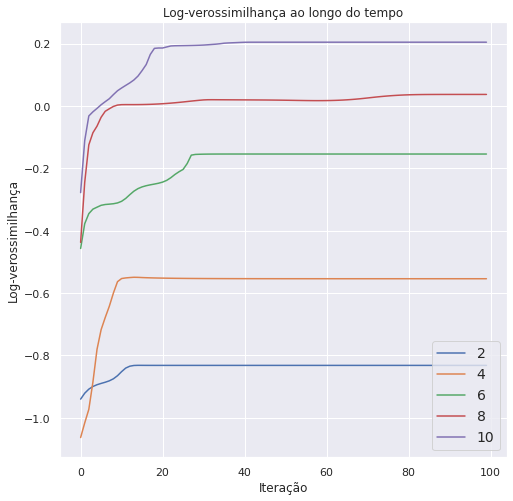

In [ ]:
plot_loglikelihood(log_likelihoods)

## Bônus: Utilização do modelo `GaussianMixtureModelSimples`

Este modelo refere-se ao primeiro apresentado na sala de aula (slide 16).

### `GaussianMixtureModelSimples` - Modelo de Mistura de Gaussianas Simples
 
* @param $K$: Total de componentes / _clusters_ da GMM
* @param $π_0$: $p(z_i=k)$ = Probabilidade a priori do dado pertencer
  ao k-ésimo _cluster_
* @param $\text{Means}_0$: Matriz composta de vetores de médias $μ_0$ iniciais para cada k-ésimo _cluster_
* @param $Σ_0$: Matrizes de covariancia iniciais para cada k-ésimo _cluster_

In [ ]:
class GaussianMixtureModelSimples:
    def __init__(self, K, π_0, Means_0, Σ_0):
        """
        `GaussianMixtureModelSimples` - Modelo de Mistura de Gaussianas simples
 
        @param $K$: Total de componentes / _clusters_ da GMM
        @param $π_0$: $p(z_i=k)$ = Probabilidade a priori do dado pertencer
                               ao k-ésimo _cluster_
        @param $\text{Means}_0$: Matriz composta de vetores de médias $μ_0$ iniciais para cada k-ésimo _cluster_
        @param $Σ_0$: Matrizes de covariancia iniciais para cada k-ésimo _cluster_
        """
        self.K = K

        self.π_0 = π_0

        self.Means_0 = Means_0
        self.Σ_0 = Σ_0

        self.M = Means_0
        self.Σ = Σ_0

    def fit(self, X, t_maximo=10):
        π = self.π_0
        M = self.Means_0
        Σ = self.Σ_0
        
        log_likelihoods = []

        for t in range(1, t_maximo+1):
            R = self.expectation(X, π, self.M, self.Σ)
            π, self.M, self.Σ = self.maximization(X, R)

            ll = self.log_likelihood(X, π, self.M, self.Σ)
            log_likelihoods.append(ll)

        return np.array(log_likelihoods)

    def expectation(self, X, π, M, Σ):
        """
        r_ik = p(z_i=k|x_i, θ)

        @param X: Conjunto de dados
        @param π: Probabilidade a priori do dado pertencer ao k-ésimo _cluster_
        @param M: Matriz de médias μ para cada k-ésimo _cluster_
        @param Σ: Matrizes de covariancia para cada k-ésimo _cluster_
        
        @return R = Matriz dos k-ésimos r_k vetores responsabilidade
        """
        R = π * Normais(X, M, Σ)
        return R / np.sum(R, axis=0)

    def maximization(self, X, R):
        N, D = X.shape
        K = self.K

        # Murphy 11.28
        r = R.sum(axis=1).reshape((-1, 1))
        π = r/N

        # Murphy 11.31
        Means = (R @ X) / r

        # Murphy 11.32
        Σ = np.zeros((K, D, D))
        for k in range(K):
            μ_k = Means[k].reshape((-1, 1))
            r_k = r[k, 0]

            Σ[k] = self.Σ_k(k, X, R, r_k, μ_k)

        return π, Means, Σ

    # Murphy 11.32
    def Σ_k(self, k, X, R, r_k, μ_k):
        N, D = X.shape

        # Numerador do primeiro termo de Murphy 11.32
        S_k = np.zeros((D, D))
        for i in range(N):
            x_i = X[i].reshape((-1, 1))
            r_ik = R[k, i]

            S_k += r_ik * x_i@x_i.T

        # Murphy 11.32
        return S_k/r_k - μ_k@μ_k.T

    def log_likelihood(self, X, π, M, Σ):
        return np.log(np.sum(π * Normais(X, M, Σ)))

In [ ]:
def inicializar_GMM(X, K):
    N, D = X.shape

    if inicializacao == 'k-means++':
        Means_0, Σ_0 = inicializacao_kmeansplusplus(X, K)
    else:
        Means_0, Σ_0 = inicializacao_aleatoria(X, K)

    return GaussianMixtureModelSimples(
        K=K,
        # Vetor π
        π_0 = np.ones((K, 1)) * 1/K,

        # Matriz de médias: Centroides do k-means++
        Means_0=Means_0,
        # Tensor de covariâncias: Matrízes de covariância dos grupos de k-means++ encontrados
        Σ_0 = Σ_0
    )

### Gráfico solicitado

`LinAlgError` geralmente ocorre por problemas de matriz singular :(

Não foi possível finalizar a execução para K=10, LinAlgError
Não foi possível exibir a distribuição a posteriori para K=10, LinAlgError


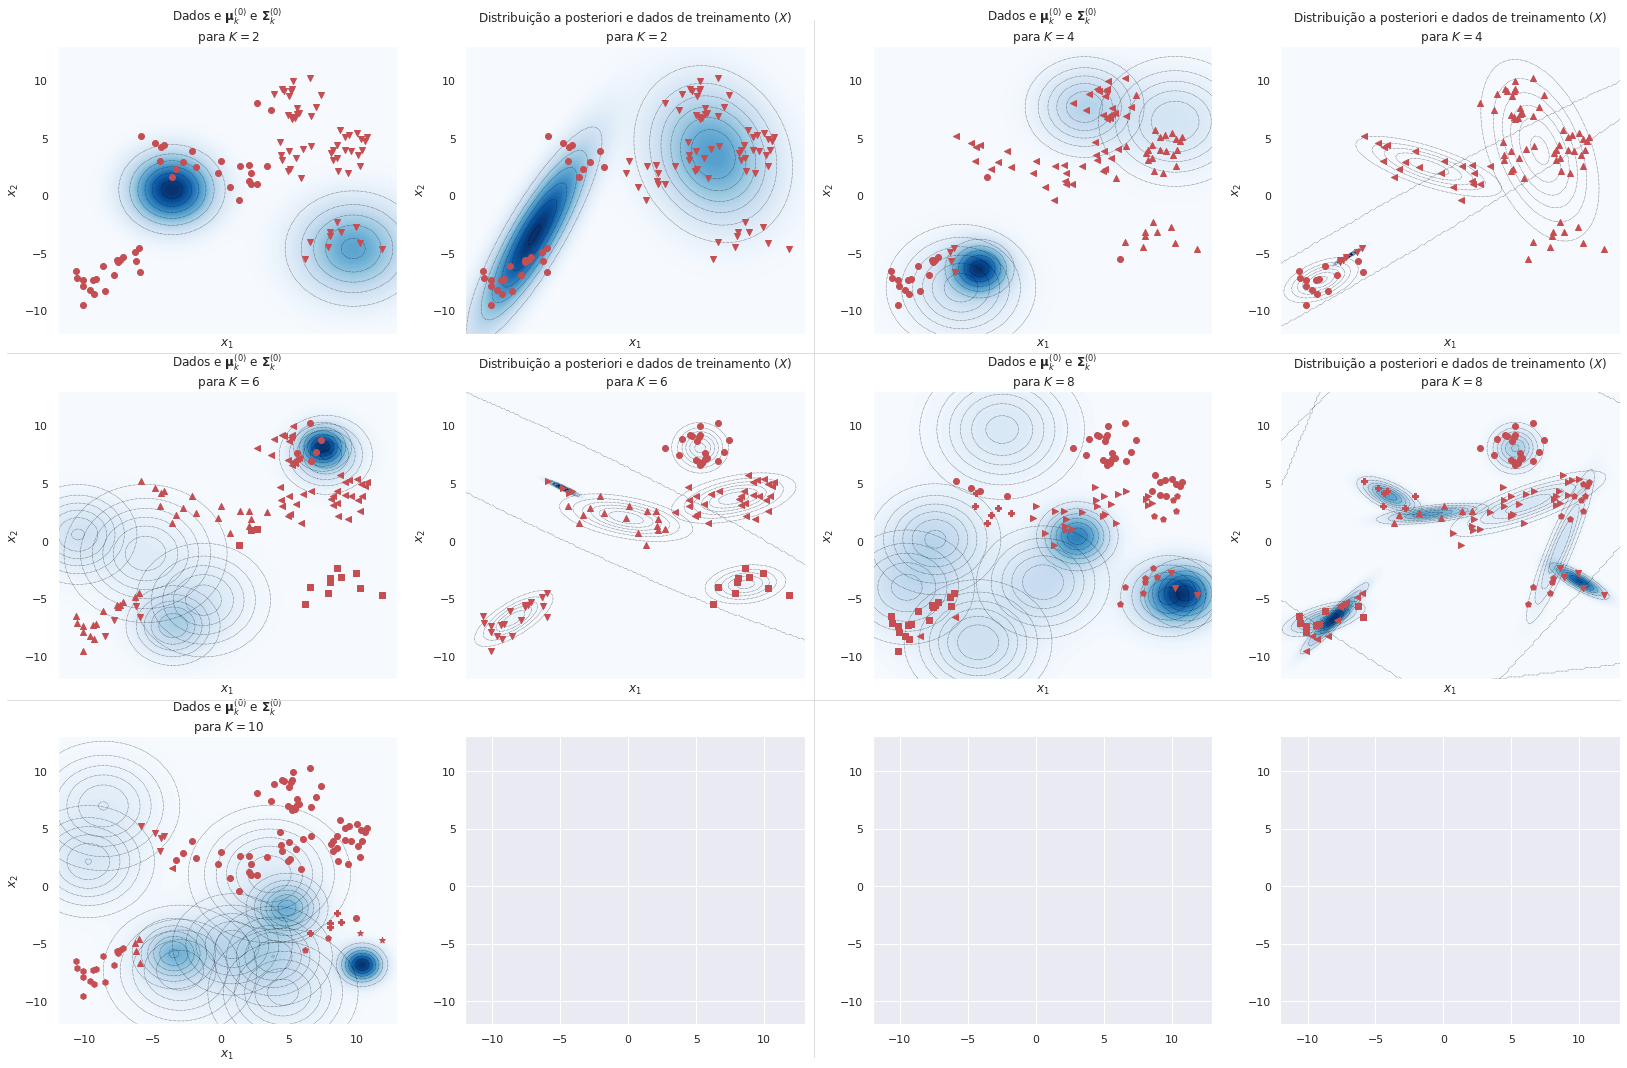

In [ ]:
log_likelihoods = plot_geral(inicializador_modelo=inicializar_GMM)

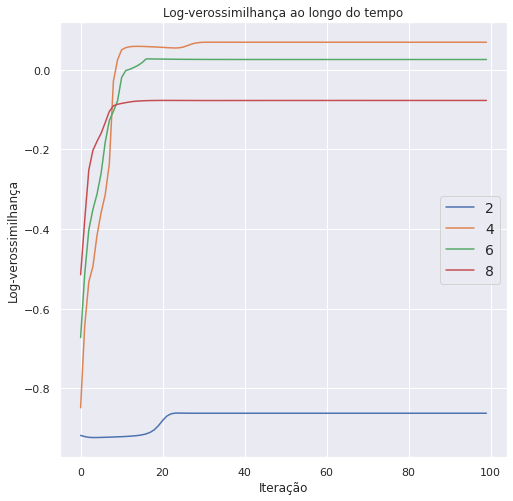

In [ ]:
plot_loglikelihood(log_likelihoods)